In [1]:
!pip install citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-76.61709182027732, -116.9840269147621),
 (-22.35838330971528, 144.83088690120633),
 (45.43527458513634, 82.85184886738966),
 (-70.99432978338345, 152.52351891516082),
 (77.3231236901853, -106.36932967158702),
 (-13.198290237659364, -84.99345279784387),
 (-81.37870424160552, 106.19463590618557),
 (-25.177249606884573, 168.0208045733459),
 (-31.86934508919643, 112.78174446157385),
 (80.96617813053498, -32.899631266308006),
 (82.36793404435085, -70.98781680755873),
 (-75.31483226781614, -40.57965095921031),
 (27.201888200951828, -73.75109214661036),
 (79.70169478959409, -70.88669914373102),
 (70.93084401361378, -140.04328855368283),
 (79.97321408976751, 38.56222210179931),
 (19.970287975406748, 141.89198917277167),
 (50.825866292696475, -72.65812307825776),
 (-48.64073851205226, 164.38857479676187),
 (68.69022562665012, -86.874040333865),
 (-88.96490686807869, 98.97334165314675),
 (-35.93023530561151, -53.182183811838115),
 (15.237938474888978, -2.5972500799453826),
 (19.50377104130025

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
#import dependencies
from config import weather_api_key
import requests
from datetime import datetime

In [7]:
#build basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | charters towers
Processing Record 3 of Set 1 | karamay
City not found. Skipping...
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | huarmey
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | vao
Processing Record 9 of Set 1 | mandurah
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | aklavik
Processing Record 15 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | albanel
Processing Record 18 of Set 1 | tuatapere
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | rocha
Proces

Processing Record 39 of Set 4 | north bend
Processing Record 40 of Set 4 | stamford
Processing Record 41 of Set 4 | boyolangu
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | cap malheureux
Processing Record 44 of Set 4 | buraydah
Processing Record 45 of Set 4 | bud
Processing Record 46 of Set 4 | krasnovishersk
Processing Record 47 of Set 4 | seminole
Processing Record 48 of Set 4 | ust-nera
Processing Record 49 of Set 4 | mananjary
Processing Record 50 of Set 4 | punta alta
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | vestmannaeyjar
Processing Record 3 of Set 5 | palamos
Processing Record 4 of Set 5 | grand gaube
Processing Record 5 of Set 5 | saint-francois
Processing Record 6 of Set 5 | mahebourg
Processing Record 7 of Set 5 | nizwa
Processing Record 8 of Set 5 | bilibino
Processing Record 9 of Set 5 | imeni poliny osipenko
Processing Record 10 of Set 5 | mezen
Processing Record 11 of Set 5 | okato
Processing Record 12 of Set 5 | be

Processing Record 29 of Set 8 | omboue
Processing Record 30 of Set 8 | freeport
Processing Record 31 of Set 8 | tateyama
Processing Record 32 of Set 8 | amga
Processing Record 33 of Set 8 | rochefort
Processing Record 34 of Set 8 | bayir
Processing Record 35 of Set 8 | malmesbury
Processing Record 36 of Set 8 | grenfell
Processing Record 37 of Set 8 | benicarlo
Processing Record 38 of Set 8 | abu dhabi
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | pointe-noire
Processing Record 41 of Set 8 | chara
Processing Record 42 of Set 8 | boa vista
Processing Record 43 of Set 8 | la seyne-sur-mer
Processing Record 44 of Set 8 | llanes
Processing Record 45 of Set 8 | cornereva
Processing Record 46 of Set 8 | bac lieu
Processing Record 47 of Set 8 | westonaria
Processing Record 48 of Set 8 | grass valley
Processing Record 49 of Set 8 | orlik
Processing Record 50 of Set 8 | pravdinsk
Processing Record 1 of Set 9 | bunia
Processing Record 2 of Set 9 | fortuna
Processing Rec

Processing Record 14 of Set 12 | hakkari
Processing Record 15 of Set 12 | abashiri
Processing Record 16 of Set 12 | samarai
Processing Record 17 of Set 12 | harper
Processing Record 18 of Set 12 | mana
Processing Record 19 of Set 12 | kloulklubed
Processing Record 20 of Set 12 | coos bay
Processing Record 21 of Set 12 | merrill
Processing Record 22 of Set 12 | nabire
Processing Record 23 of Set 12 | turgutlu
Processing Record 24 of Set 12 | kondoa
Processing Record 25 of Set 12 | chipinge
Processing Record 26 of Set 12 | amapa
Processing Record 27 of Set 12 | cam ranh
Processing Record 28 of Set 12 | tessalit
Processing Record 29 of Set 12 | carnarvon
Processing Record 30 of Set 12 | polyarnyy
Processing Record 31 of Set 12 | luderitz
Processing Record 32 of Set 12 | waitati
Processing Record 33 of Set 12 | andenes
Processing Record 34 of Set 12 | galesong
Processing Record 35 of Set 12 | pangkalanbuun
Processing Record 36 of Set 12 | ucluelet
Processing Record 37 of Set 12 | vanimo
Pr

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,39.31,87,20,31.07,CL,2021-10-22 23:31:42
1,Charters Towers,-20.1000,146.2667,87.76,37,66,10.18,AU,2021-10-22 23:35:17
2,Hobart,-42.8794,147.3294,56.01,93,75,1.01,AU,2021-10-22 23:35:18
3,Yellowknife,62.4560,-114.3525,44.42,67,40,19.57,CA,2021-10-22 23:32:32
4,Huarmey,-10.0681,-78.1522,64.54,84,25,9.86,PE,2021-10-22 23:35:19
5,Albany,42.6001,-73.9662,51.75,73,82,5.01,US,2021-10-22 23:35:19
6,Vao,-22.6667,167.4833,73.06,78,0,5.08,NC,2021-10-22 23:31:13
7,Mandurah,-32.5500,115.7000,63.16,61,1,6.78,AU,2021-10-22 23:35:20
8,Qaanaaq,77.4840,-69.3632,-0.62,64,0,8.46,GL,2021-10-22 23:35:20
9,Ushuaia,-54.8000,-68.3000,46.06,66,75,35.68,AR,2021-10-22 23:31:19


In [10]:
# Rearrange columns
new_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-10-22 23:31:42,-53.1500,-70.9167,39.31,87,20,31.07
1,Charters Towers,AU,2021-10-22 23:35:17,-20.1000,146.2667,87.76,37,66,10.18
2,Hobart,AU,2021-10-22 23:35:18,-42.8794,147.3294,56.01,93,75,1.01
3,Yellowknife,CA,2021-10-22 23:32:32,62.4560,-114.3525,44.42,67,40,19.57
4,Huarmey,PE,2021-10-22 23:35:19,-10.0681,-78.1522,64.54,84,25,9.86
5,Albany,US,2021-10-22 23:35:19,42.6001,-73.9662,51.75,73,82,5.01
6,Vao,NC,2021-10-22 23:31:13,-22.6667,167.4833,73.06,78,0,5.08
7,Mandurah,AU,2021-10-22 23:35:20,-32.5500,115.7000,63.16,61,1,6.78
8,Qaanaaq,GL,2021-10-22 23:35:20,77.4840,-69.3632,-0.62,64,0,8.46
9,Ushuaia,AR,2021-10-22 23:31:19,-54.8000,-68.3000,46.06,66,75,35.68


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1634946608.2201421

In [14]:
time.strftime("%x")

'10/22/21'

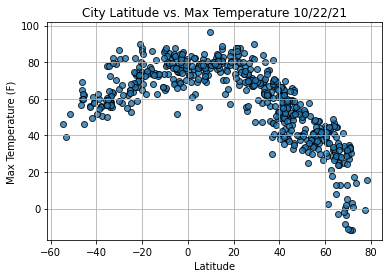

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

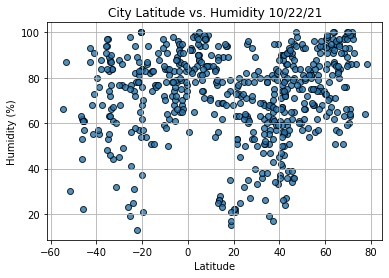

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

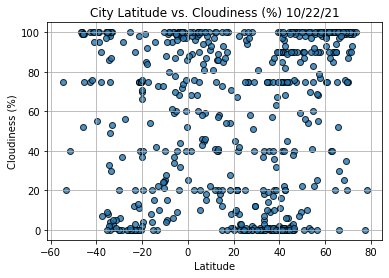

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

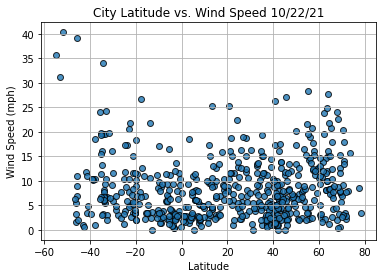

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()